In [36]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [37]:
file = 'data/01.01.2009-30.07.2024.csv'
df = pd.read_csv(file, sep=';', encoding='utf-8', index_col=False) 

In [38]:
df = df.iloc[::-1].reset_index(drop=True)

df['Местное время в Иркутске'] = pd.to_datetime(df['Местное время в Иркутске'], format='%d.%m.%Y %H:%M')
df['YEAR'] = df['Местное время в Иркутске'].dt.year
df['MO'] = df['Местное время в Иркутске'].dt.month
df['DY'] = df['Местное время в Иркутске'].dt.day
df['HR'] = df['Местное время в Иркутске'].dt.hour
df = df.drop(columns=['Местное время в Иркутске'])
drop_columns = ['P', 'Pa', 'ff10', 'ff3', 'Tn', 'Tx', 'VV', 'Td', 'E', 'Tg', "E'", 'sss', 'WW','W2','RRR','tR', 'DD', 'Cl','H','Cm','Ch']
df = df.drop(columns=drop_columns, errors='ignore')
cols = ['YEAR', 'MO', 'DY', 'HR'] + [col for col in df.columns if col not in ['YEAR', 'MO', 'DY', 'HR']]
df = df[cols]

In [33]:
df.head()

,YEAR,MO,DY,HR,T,Po,U,Ff,N,W1
0,2009,2,25,20,-4.5,722.4,39.0,2.0,100%.,NaN
1,2009,2,25,23,-6.6,724.4,53.0,3.0,60%.,NaN
2,2009,2,26,2,-8.7,726.0,86.0,2.0,100%.,Ливень (ливни).
3,2009,2,26,5,-10.2,727.3,85.0,2.0,100%.,Ливень (ливни).
4,2009,2,26,8,-11.8,728.2,90.0,1.0,100%.,Ливень (ливни).


In [39]:
json_file = 'unique.json'
with open(json_file , 'r', encoding='utf-8') as f:
    replacement_rules = json.load(f)
    
for column, replacements in replacement_rules.items():
    if column in df.columns:
        df[column] = df[column].replace(replacements)
df["W1"] = df["W1"].fillna(0.0)
df["Nh"] = df["Nh"].fillna(0.0)


In [20]:
df.head()

,YEAR,MO,DY,HR,T,Po,U,Ff,N,W1,Nh
0,2009,2,25,20,-4.5,722.4,39.0,2.0,1.0,0.0,0.25
1,2009,2,25,23,-6.6,724.4,53.0,3.0,0.6,0.0,0.60
2,2009,2,26,2,-8.7,726.0,86.0,2.0,1.0,1.0,1.00
3,2009,2,26,5,-10.2,727.3,85.0,2.0,1.0,1.0,1.00
4,2009,2,26,8,-11.8,728.2,90.0,1.0,1.0,1.0,1.00


In [40]:
df[['YEAR', 'MO', 'DY', 'HR']] = df[['YEAR', 'MO', 'DY', 'HR']].apply(pd.to_numeric, errors='coerce')


data_cleaned = df.dropna(subset=['YEAR', 'MO', 'DY', 'HR'])

data_cleaned['datetime'] = pd.to_datetime(data_cleaned[['YEAR', 'MO', 'DY', 'HR']].astype(str).agg('-'.join, axis=1), errors='coerce')


data_cleaned.set_index('datetime', inplace=True)

hourly_data = pd.DataFrame()

hourly_data['T'] = data_cleaned['T'].resample('H').interpolate(method='linear')
hourly_data['Po'] = data_cleaned['Po'].resample('H').interpolate(method='linear')
hourly_data['U'] = data_cleaned['U'].resample('H').interpolate(method='linear')
hourly_data['Ff'] = data_cleaned['Ff'].resample('H').interpolate(method='linear')
hourly_data['N'] = data_cleaned['N'].resample('H').interpolate(method='linear')
hourly_data['W1'] = data_cleaned['W1'].resample('H').interpolate(method='linear')
hourly_data['Nh'] = data_cleaned['Nh'].resample('H').interpolate(method='linear')

hourly_data['YEAR'] = hourly_data.index.year
hourly_data['MO'] = hourly_data.index.month
hourly_data['DY'] = hourly_data.index.day
hourly_data['HR'] = hourly_data.index.hour

df = hourly_data[['YEAR', 'MO', 'DY', 'HR', 'T', 'Po', 'U', 'Ff', 'N', 'W1', 'Nh']]
df = df.reset_index(drop=True)


In [22]:
df.head()

,YEAR,MO,DY,HR,T,Po,U,Ff,N,W1,Nh
0,2009,2,25,20,-4.5,722.400000,39.000000,2.000000,1.000000,0.000000,0.250000
1,2009,2,25,21,-5.2,723.066667,43.666667,2.333333,0.866667,0.000000,0.366667
2,2009,2,25,22,-5.9,723.733333,48.333333,2.666667,0.733333,0.000000,0.483333
3,2009,2,25,23,-6.6,724.400000,53.000000,3.000000,0.600000,0.000000,0.600000
4,2009,2,26,0,-7.3,724.933333,64.000000,2.666667,0.733333,0.333333,0.733333


In [41]:
rad = pd.read_csv("rad.csv", delimiter=';', encoding='utf-8', index_col=False)
df = pd.merge(df, rad[['MO', 'DY', 'HR', 'sinα', 'Ho']], on=['MO', 'DY', 'HR'], how='left')

In [25]:
df.head()

,YEAR,MO,DY,HR,T,Po,U,Ff,N,W1,sinα,Ho
0,2009,2,25,20,-4.5,722.400000,39.000000,2.000000,1.000000,0.000000,0.0,0.0
1,2009,2,25,21,-5.2,723.066667,43.666667,2.333333,0.866667,0.000000,0.0,0.0
2,2009,2,25,22,-5.9,723.733333,48.333333,2.666667,0.733333,0.000000,0.0,0.0
3,2009,2,25,23,-6.6,724.400000,53.000000,3.000000,0.600000,0.000000,0.0,0.0
4,2009,2,26,0,-7.3,724.933333,64.000000,2.666667,0.733333,0.333333,0.0,0.0


In [42]:
solar = pd.read_csv("solar4.csv", delimiter=';', encoding='utf-8', index_col=False)
df = pd.merge(df, solar[['YEAR', 'MO', 'DY', 'HR', 'ALLSKY_SFC_SW_DIFF', 'CLRSKY_SFC_SW_DWN', 'ALLSKY_SFC_SW_DNI', 'ALLSKY_SFC_SW_DWN']], on=['YEAR', 'MO', 'DY', 'HR'], how='inner')

In [29]:
df.head()

,YEAR,MO,DY,HR,T,Po,U,Ff,N,W1,sinα,Ho,ALLSKY_SFC_SW_DIFF,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DWN
0,2009,2,25,20,-4.5,722.400000,39.000000,2.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,2009,2,25,21,-5.2,723.066667,43.666667,2.333333,0.866667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,2009,2,25,22,-5.9,723.733333,48.333333,2.666667,0.733333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,2009,2,25,23,-6.6,724.400000,53.000000,3.000000,0.600000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,2009,2,26,0,-7.3,724.933333,64.000000,2.666667,0.733333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0


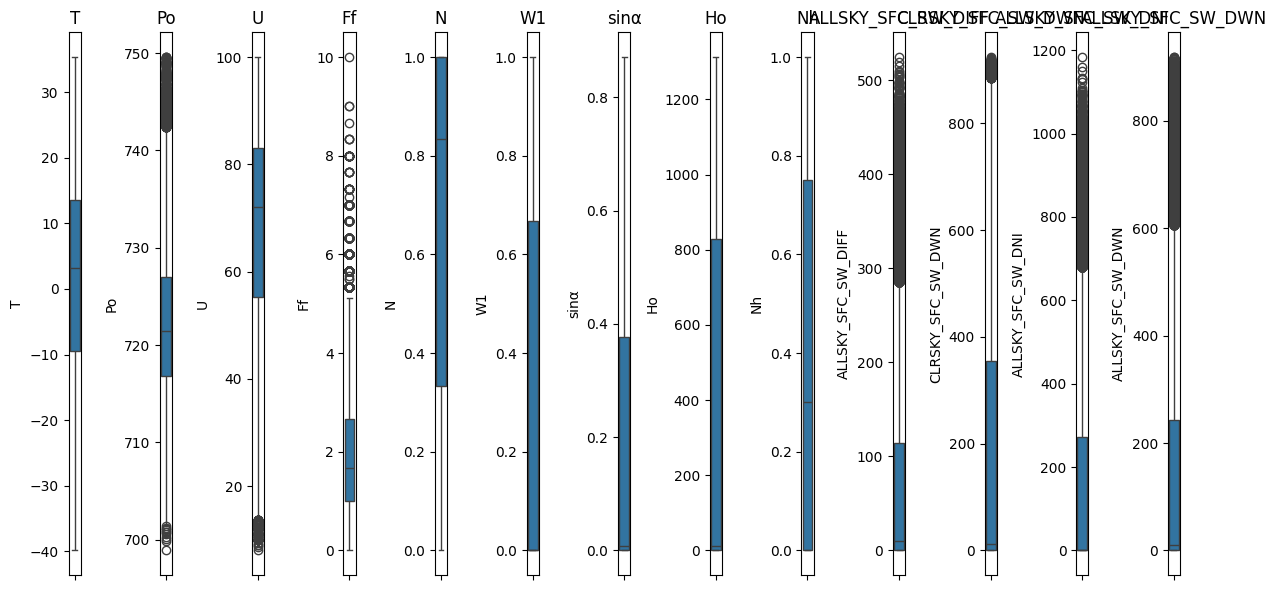

In [25]:
num_cols = [ 'T' ,'Po', 'U', 'Ff', 'N', 'W1', 'sinα', 'Ho', 'Nh', 'ALLSKY_SFC_SW_DIFF', 'CLRSKY_SFC_SW_DWN',  'ALLSKY_SFC_SW_DNI', 'ALLSKY_SFC_SW_DWN']
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, len(num_cols), i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
data = df.copy()

numerical_columns = ['T' ,'Po', 'U', 'Ff', 'N', 'W1', 'sinα', 'Ho', 'Nh', 'ALLSKY_SFC_SW_DIFF', 'CLRSKY_SFC_SW_DWN',  'ALLSKY_SFC_SW_DNI', 'ALLSKY_SFC_SW_DWN']

for column in numerical_columns:
    data[column] = data[column].astype(str).str.replace(',', '.').astype(float)

data['MO'] = data['MO'].astype(int)
data['DY'] = data['DY'].astype(int)

data['DayOfYear'] = pd.to_datetime(
    data[['YEAR', 'MO', 'DY']].astype(str).agg('-'.join, axis=1), errors='coerce'
).dt.dayofyear.fillna(0).astype(int)

data['sin_month'] = np.sin(2 * np.pi * data['MO'] / 12)
data['cos_month'] = np.cos(2 * np.pi * data['MO'] / 12)

data['sin_hour'] = np.sin(2 * np.pi * data['HR'] / 24)
data['cos_hour'] = np.cos(2 * np.pi * data['HR'] / 24)
data['sin_day_year'] = np.sin(2 * np.pi * data['DayOfYear'] / 365)
data['cos_day_year'] = np.cos(2 * np.pi * data['DayOfYear'] / 365)

features = ['sin_month', 'cos_month', 'sin_hour', 'cos_hour', 'sin_day_year', 'cos_day_year',
            'T', 'Po', 'U', 'Ff', 'sinα', 'Ho', 'N', 'W1', 'Nh']
target = ['ALLSKY_SFC_SW_DIFF', 'CLRSKY_SFC_SW_DWN',  'ALLSKY_SFC_SW_DNI', 'ALLSKY_SFC_SW_DWN']

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test = y_test.values if isinstance(y_test, pd.DataFrame) else y_test


In [12]:
data.head()

,YEAR,MO,DY,HR,T,Po,U,Ff,N,W1,...,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DWN,DayOfYear,sin_month,cos_month,sin_hour,cos_hour,sin_day_year,cos_day_year
0,2009,2,25,20,-4.5,722.400000,39.000000,2.000000,1.000000,0.000000,...,0.0,0.0,0.0,56,0.866025,0.5,-0.866025,0.500000,0.821477,0.570242
1,2009,2,25,21,-5.2,723.066667,43.666667,2.333333,0.866667,0.000000,...,0.0,0.0,0.0,56,0.866025,0.5,-0.707107,0.707107,0.821477,0.570242
2,2009,2,25,22,-5.9,723.733333,48.333333,2.666667,0.733333,0.000000,...,0.0,0.0,0.0,56,0.866025,0.5,-0.500000,0.866025,0.821477,0.570242
3,2009,2,25,23,-6.6,724.400000,53.000000,3.000000,0.600000,0.000000,...,0.0,0.0,0.0,56,0.866025,0.5,-0.258819,0.965926,0.821477,0.570242
4,2009,2,26,0,-7.3,724.933333,64.000000,2.666667,0.733333,0.333333,...,0.0,0.0,0.0,57,0.866025,0.5,0.000000,1.000000,0.831171,0.556017


In [27]:
condition = (df['Ho'] == 0) & (
    (df['ALLSKY_SFC_SW_DIFF'] != 0) |
    (df['CLRSKY_SFC_SW_DWN'] != 0) |
    (df['ALLSKY_SFC_SW_DNI'] != 0) |
    (df['ALLSKY_SFC_SW_DWN'] != 0)
)

filtered_df = df[condition]
hours_by_month = filtered_df.groupby('MO')['HR'].unique()

for month, hours in hours_by_month.items():
    print(f"Месяц {month}: Часы {sorted(hours)}")

Месяц 1: Часы [8, 9]
Месяц 2: Часы [7, 8]
Месяц 3: Часы [6, 7]
Месяц 4: Часы [5, 6]
Месяц 5: Часы [4, 5]
Месяц 6: Часы [4]
Месяц 7: Часы [4, 5]
Месяц 8: Часы [4, 5, 6]
Месяц 9: Часы [5, 6, 7]
Месяц 10: Часы [6, 7, 8]
Месяц 11: Часы [7, 8, 9]
Месяц 12: Часы [8, 9]


In [28]:
filtered_df.head()

,YEAR,MO,DY,HR,T,Po,U,Ff,N,W1,sinα,Ho,ALLSKY_SFC_SW_DIFF,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DWN
11,2009,2,26,7,-11.266667,727.900000,88.333333,1.333333,1.00,1.000000,0.0,0.0,34.66,53.30,126.16,40.85
35,2009,2,27,7,-14.800000,727.400000,87.000000,0.000000,0.80,0.666667,0.0,0.0,39.00,58.72,172.35,46.53
59,2009,2,28,7,-13.766667,731.566667,93.333333,1.000000,0.95,1.000000,0.0,0.0,45.41,62.17,81.57,47.97
82,2009,3,1,6,-15.466667,730.766667,89.666667,1.000000,0.00,0.000000,0.0,0.0,0.25,0.28,39.38,0.28
83,2009,3,1,7,-15.933333,730.933333,90.333333,1.000000,0.00,0.000000,0.0,0.0,33.52,61.90,208.29,53.88


In [32]:
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Лес 

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
multi_target_rf = MultiOutputRegressor(rf)
multi_target_rf.fit(X_train, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [12]:
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

In [14]:
scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'MSE': make_scorer(mean_squared_error, greater_is_better=False),
    'R2': make_scorer(r2_score)
}

cv_results = cross_validate(multi_target_rf, X_train_scaled, y_train, cv=5, scoring=scoring, n_jobs=-1)

print("Средние метрики по кросс-валидации:")
print(f"  Средний MAE: {-np.mean(cv_results['test_MAE']):.4f}")
print(f"  Средний MSE: {-np.mean(cv_results['test_MSE']):.4f}")
print(f"  Средний R²: {np.mean(cv_results['test_R2']):.4f}")
print("-" * 40)

Средние метрики по кросс-валидации:
  Средний MAE: 25.7632
  Средний MSE: 4091.4008
  Средний R²: 0.9144
----------------------------------------


In [15]:
multi_target_rf.fit(X_train, y_train)
y_pred = multi_target_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred, multioutput='raw_values')
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
r2 = r2_score(y_test, y_pred, multioutput='raw_values')

print("Средние метрики по всем переменным:")
print(f"  Средний MAE: {np.mean(mae):.4f}")
print(f"  Средний MSE: {np.mean(mse):.4f}")
print(f"  Средний R²: {np.mean(r2):.4f}")

Средние метрики по всем переменным:
  Средний MAE: 25.4759
  Средний MSE: 3979.6651
  Средний R²: 0.9157


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_test = y_test.values if isinstance(y_test, pd.DataFrame) else y_test

y_pred = multi_target_rf.predict(X_test)

for i in range(y_test.shape[1]): 
    print(f"Оценка для целевой переменной {target[i]}:")
    print(f"  MAE: {mean_absolute_error(y_test[:, i], y_pred[:, i]):.4f}")
    print(f"  MSE: {mean_squared_error(y_test[:, i], y_pred[:, i]):.4f}")
    print(f"  R^2: {r2_score(y_test[:, i], y_pred[:, i]):.4f}")
    print("-" * 40)

Оценка для целевой переменной ALLSKY_SFC_SW_DIFF:
  MAE: 17.6168
  MSE: 1290.0582
  R^2: 0.8618
----------------------------------------
Оценка для целевой переменной CLRSKY_SFC_SW_DWN:
  MAE: 6.6484
  MSE: 232.8031
  R^2: 0.9967
----------------------------------------
Оценка для целевой переменной ALLSKY_SFC_SW_DNI:
  MAE: 64.4561
  MSE: 14544.3679
  R^2: 0.7975
----------------------------------------
Оценка для целевой переменной ALLSKY_SFC_SW_DWN:
  MAE: 19.8644
  MSE: 1837.9214
  R^2: 0.9595
----------------------------------------


In [35]:
import joblib
joblib.dump(multi_target_rf, "model.pkl")

['model.pkl']

## Нейронка

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [180]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_sc = scaler_X.fit_transform(X_train)
X_test_sc = scaler_X.transform(X_test)

y_train_sc = scaler_y.fit_transform(y_train)
y_test_sc = scaler_y.transform(y_test)

# Преобразование данных в PyTorch tensors
X_train_tensor = torch.tensor(X_train_sc, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_sc, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_sc, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_sc, dtype=torch.float32)

# Определение модели нейронной сети
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        # Полносвязные слои
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, output_size)

    def forward(self, x):
        # Прямой проход через слои с активацией ReLU
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # Нет активации на выходном слое (для регрессии)
        return x

# Определяем устройство для использования (GPU или CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Инициализация модели
model = SimpleNN(input_size=14, output_size=4).to(device)

# Настройка оптимизатора и функции потерь
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Обучение модели
epochs = 300
for epoch in range(epochs):
    model.train()

    # Перемещение данных на GPU (если доступно)
    inputs = X_train_tensor.to(device)
    targets = y_train_tensor.to(device)

    # Обнуляем градиенты
    optimizer.zero_grad()

    # Прямой проход
    outputs = model(inputs)

    # Вычисление потерь
    loss = criterion(outputs, targets)

    # Обратный проход и обновление параметров
    loss.backward()
    optimizer.step()

    # Выводим прогресс
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

/home/russmirnag/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Epoch [10/300], Loss: 0.8592
Epoch [20/300], Loss: 0.6849
Epoch [30/300], Loss: 0.4693
Epoch [40/300], Loss: 0.2810
Epoch [50/300], Loss: 0.2068
Epoch [60/300], Loss: 0.1756
Epoch [70/300], Loss: 0.1550
Epoch [80/300], Loss: 0.1423
Epoch [90/300], Loss: 0.1326
Epoch [100/300], Loss: 0.1258
Epoch [110/300], Loss: 0.1209
Epoch [120/300], Loss: 0.1174
Epoch [130/300], Loss: 0.1149
Epoch [140/300], Loss: 0.1131
Epoch [150/300], Loss: 0.1115
Epoch [160/300], Loss: 0.1102
Epoch [170/300], Loss: 0.1091
Epoch [180/300], Loss: 0.1081
Epoch [190/300], Loss: 0.1072
Epoch [200/300], Loss: 0.1064
Epoch [210/300], Loss: 0.1056
Epoch [220/300], Loss: 0.1049
Epoch [230/300], Loss: 0.1043
Epoch [240/300], Loss: 0.1037
Epoch [250/300], Loss: 0.1032
Epoch [260/300], Loss: 0.1027
Epoch [270/300], Loss: 0.1022
Epoch [280/300], Loss: 0.1017
Epoch [290/300], Loss: 0.1013
Epoch [300/300], Loss: 0.1009


In [181]:
model.eval()
with torch.no_grad():
    # Перемещение тестовых данных на GPU (если доступно)
    X_test_tensor = X_test_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)
    
    # Прогнозирование
    predictions = model(X_test_tensor)

    # Преобразуем предсказания в numpy-массив с правильной формой
    predictions = predictions.cpu().numpy()

    # Убедитесь, что predictions и y_test имеют правильную форму
    predictions = predictions.reshape(-1, 4)  # 4 целевые переменные

    # Возвращаем результаты в исходный масштаб (обратная стандартизация)
    predictions = scaler_y.inverse_transform(predictions)
    y_test = scaler_y.inverse_transform(y_test_tensor.cpu().numpy())

    # Оценка модели для каждой целевой переменной
    for i in range(predictions.shape[1]):
        print(f"Оценка для целевой переменной {target[i]}:")
        
        # Оценка для целевой переменной i
        mae = mean_absolute_error(y_test[:, i], predictions[:, i])
        mse = mean_squared_error(y_test[:, i], predictions[:, i])
        r2 = r2_score(y_test[:, i], predictions[:, i])

        # Вывод оценок
        print(f"  MAE: {mae:.4f}")
        print(f"  MSE: {mse:.4f}")
        print(f"  R^2: {r2:.4f}")
        print("-" * 40)

Оценка для целевой переменной ALLSKY_SFC_SW_DIFF:
  MAE: 19.1314
  MSE: 1225.7051
  R^2: 0.8687
----------------------------------------
Оценка для целевой переменной CLRSKY_SFC_SW_DWN:
  MAE: 14.9902
  MSE: 497.1648
  R^2: 0.9930
----------------------------------------
Оценка для целевой переменной ALLSKY_SFC_SW_DNI:
  MAE: 73.8805
  MSE: 15304.8018
  R^2: 0.7869
----------------------------------------
Оценка для целевой переменной ALLSKY_SFC_SW_DWN:
  MAE: 28.0438
  MSE: 2456.7451
  R^2: 0.9459
----------------------------------------


## Другое

In [33]:
import xgboost as xgb
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05)
multi_target_model = MultiOutputRegressor(model)
multi_target_model.fit(X_train_scaled, y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=1000, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))

In [34]:
y_pred = multi_target_model.predict(X_test_scaled)
for i in range(y_test.shape[1]): 
    print(f"Оценка для целевой переменной {target[i]}:")
    print(f"  MAE: {mean_absolute_error(y_test[:, i], y_pred[:, i]):.4f}")
    print(f"  MSE: {mean_squared_error(y_test[:, i], y_pred[:, i]):.4f}")
    print(f"  R^2: {r2_score(y_test[:, i], y_pred[:, i]):.4f}")
    print("-" * 40)

Оценка для целевой переменной ALLSKY_SFC_SW_DIFF:
  MAE: 15.7721
  MSE: 975.1811
  R^2: 0.8955
----------------------------------------
Оценка для целевой переменной CLRSKY_SFC_SW_DWN:
  MAE: 6.1013
  MSE: 169.9213
  R^2: 0.9976
----------------------------------------
Оценка для целевой переменной ALLSKY_SFC_SW_DNI:
  MAE: 57.3840
  MSE: 10986.0552
  R^2: 0.8470
----------------------------------------
Оценка для целевой переменной ALLSKY_SFC_SW_DWN:
  MAE: 18.1806
  MSE: 1457.1027
  R^2: 0.9679
----------------------------------------


In [25]:
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_test)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_poly)
X_val_scaled = scaler.transform(X_val_poly)

In [15]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
multi_target_ridge = MultiOutputRegressor(ridge)
multi_target_ridge.fit(X_train_scaled, y_train)

MultiOutputRegressor(estimator=Ridge())

In [17]:
y_pred = multi_target_ridge.predict(X_val_scaled)
for i in range(y_test.shape[1]): 
    print(f"Оценка для целевой переменной {target[i]}:")
    print(f"  MAE: {mean_absolute_error(y_test[:, i], y_pred[:, i]):.4f}")
    print(f"  MSE: {mean_squared_error(y_test[:, i], y_pred[:, i]):.4f}")
    print(f"  R^2: {r2_score(y_test[:, i], y_pred[:, i]):.4f}")
    print("-" * 40)

Оценка для целевой переменной ALLSKY_SFC_SW_DIFF:
  MAE: 20.1786
  MSE: 1276.5219
  R^2: 0.8632
----------------------------------------
Оценка для целевой переменной CLRSKY_SFC_SW_DWN:
  MAE: 10.9454
  MSE: 342.4183
  R^2: 0.9952
----------------------------------------
Оценка для целевой переменной ALLSKY_SFC_SW_DNI:
  MAE: 80.9982
  MSE: 16183.7032
  R^2: 0.7746
----------------------------------------
Оценка для целевой переменной ALLSKY_SFC_SW_DWN:
  MAE: 28.6534
  MSE: 2511.4882
  R^2: 0.9447
----------------------------------------


In [20]:
from sklearn.svm import LinearSVR
svr = LinearSVR(C=1.0, max_iter=10000)
multi_target_svr = MultiOutputRegressor(svr)
multi_target_svr.fit(X_train_scaled, y_train)

MultiOutputRegressor(estimator=LinearSVR(max_iter=10000))

In [21]:
y_pred = multi_target_svr.predict(X_val_scaled)
for i in range(y_test.shape[1]): 
    print(f"Оценка для целевой переменной {target[i]}:")
    print(f"  MAE: {mean_absolute_error(y_test[:, i], y_pred[:, i]):.4f}")
    print(f"  MSE: {mean_squared_error(y_test[:, i], y_pred[:, i]):.4f}")
    print(f"  R^2: {r2_score(y_test[:, i], y_pred[:, i]):.4f}")
    print("-" * 40)

Оценка для целевой переменной ALLSKY_SFC_SW_DIFF:
  MAE: 18.5774
  MSE: 1346.1071
  R^2: 0.8558
----------------------------------------
Оценка для целевой переменной CLRSKY_SFC_SW_DWN:
  MAE: 9.7766
  MSE: 382.2710
  R^2: 0.9946
----------------------------------------
Оценка для целевой переменной ALLSKY_SFC_SW_DNI:
  MAE: 73.4088
  MSE: 17801.1862
  R^2: 0.7521
----------------------------------------
Оценка для целевой переменной ALLSKY_SFC_SW_DWN:
  MAE: 25.8246
  MSE: 2746.3157
  R^2: 0.9395
----------------------------------------


In [30]:
from sklearn.neighbors import KNeighborsRegressor
kn = KNeighborsRegressor(n_neighbors=10)
multi_target_kn = MultiOutputRegressor(svr)
multi_target_kn.fit(X_train_scaled, y_train)

MultiOutputRegressor(estimator=LinearSVR(max_iter=10000))

In [31]:
y_pred = multi_target_kn.predict(X_val_scaled)
for i in range(y_test.shape[1]): 
    print(f"Оценка для целевой переменной {target[i]}:")
    print(f"  MAE: {mean_absolute_error(y_test[:, i], y_pred[:, i]):.4f}")
    print(f"  MSE: {mean_squared_error(y_test[:, i], y_pred[:, i]):.4f}")
    print(f"  R^2: {r2_score(y_test[:, i], y_pred[:, i]):.4f}")
    print("-" * 40)

Оценка для целевой переменной ALLSKY_SFC_SW_DIFF:
  MAE: 18.5771
  MSE: 1346.0809
  R^2: 0.8558
----------------------------------------
Оценка для целевой переменной CLRSKY_SFC_SW_DWN:
  MAE: 9.7766
  MSE: 381.9964
  R^2: 0.9946
----------------------------------------
Оценка для целевой переменной ALLSKY_SFC_SW_DNI:
  MAE: 73.4045
  MSE: 17802.9677
  R^2: 0.7521
----------------------------------------
Оценка для целевой переменной ALLSKY_SFC_SW_DWN:
  MAE: 25.8228
  MSE: 2746.1311
  R^2: 0.9395
----------------------------------------


In [18]:
import math
import csv

# Параметры
latitude = 52.29  # Широта Иркутска
longitude = 104.3  # Долгота Иркутска
timezone_longitude = 120  # Долгота часового пояса (UTC+8)
I_sc = 1367  # Солнечная постоянная, Вт/м²

# Функция для расчета склонения Солнца
def declination(n):
    return 23.45 * math.sin(math.radians(360 * (284 + n) / 365))

# Функция для расчета синуса высоты Солнца
def sin_height(phi, delta, omega):
    return math.sin(math.radians(phi)) * math.sin(math.radians(delta)) + \
           math.cos(math.radians(phi)) * math.cos(math.radians(delta)) * math.cos(math.radians(omega))

# Функция для расчета внеатмосферной радиации
def extraterrestrial_radiation(I_sc, n, sin_h):
    return I_sc * (1 + 0.033 * math.cos(math.radians(360 * n / 365))) * sin_h

# Функция для перевода местного времени в солнечное время
def solar_time(local_time, longitude, timezone_longitude):
    return local_time + (longitude - timezone_longitude) / 15

# Основной расчет
data = []
for n in range(1, 366):  # Дни года
    delta = declination(n)
    for t in range(0, 24):  # Часы дня
        # Переводим местное время в солнечное время
        solar_t = solar_time(t, longitude, timezone_longitude)
        omega = 15 * (solar_t - 12)  # Часовой угол
        sin_h = sin_height(latitude, delta, omega)
        if sin_h > 0:  # Солнце над горизонтом
            I0 = extraterrestrial_radiation(I_sc, n, sin_h)
        else:
            I0 = 0.0
            sin_h = 0.0
        # Сохраняем данные в формате MO;DY;HR;sinα;Ho
        data.append([(n - 1) // 31 + 1, (n - 1) % 31 + 1, t, round(sin_h, 3), round(I0, 2)])

# Сохранение данных в CSV-файл
with open('rad_data.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=';')
    writer.writerow(['MO', 'DY', 'HR', 'sinα', 'Ho'])  # Заголовок
    writer.writerows(data)

print("Данные сохранены в файл solar_data.csv")

Данные сохранены в файл solar_data.csv
